# Домашняя работа №3

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [8]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [28]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Text(0.5, 1.0, 'Positive affect')

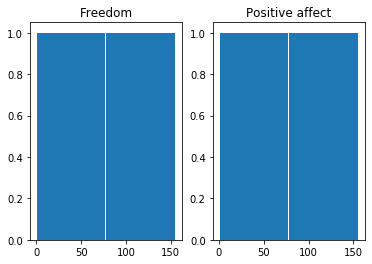

In [22]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
fig, axs = plt.subplots(1, 2)
n_bins = len(df)
axs[0].hist(df['Freedom'], bins=n_bins)
axs[0].set_title('Freedom')
axs[1].hist(df['Positive affect'], bins=n_bins)
axs[1].set_title('Positive affect')

*Это равномерное распределение Правда не могу понять что за просвет на 75*

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [86]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

*Ага, это закрался один NaN в столбцы*

In [128]:
df.to_csv("df2.csv")

In [130]:
# Specify a writer
writer = pd.ExcelWriter('df2.xlsx', engine='xlsxwriter')

# Write your DataFrame to a file     
df.to_excel(writer, 'Sheet1')

# Save the result 
writer.save()

In [138]:
df.iloc[28]

Country (region)            Qatar
Ladder                         29
SD of Ladder                   86
Positive affect               NaN
Negative affect               NaN
Social support                NaN
Freedom                       NaN
Corruption                    NaN
Generosity                    NaN
Log of GDP\nper capita          1
Healthy life\nexpectancy       43
Name: 28, dtype: object

In [105]:
# Уберем NaN из столбца Freedom, заодно убрали и из Positive affect
df1 = df[df['Freedom'] >= 0]
df1.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  7
Generosity                  0
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

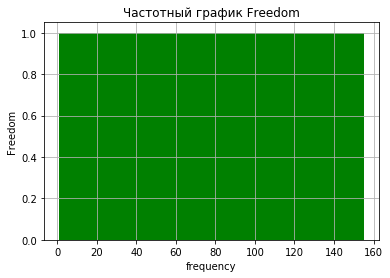

In [64]:
# теперь просвета нет
n_bins = len(df['Freedom'].dropna())
plt.hist(df['Freedom'].dropna(), bins = n_bins, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

**Медиана:**

In [143]:
# Извлекаем duration 
duration = df1['Freedom']

# Находим их количество
num_duration = len(duration)

# Сортируем в порядке возрастания
sorted_duration = sorted(duration)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_duration // 2)
if num_duration%2==0:
  result = (sorted_duration[middle-1] + sorted_duration[middle])/2
else:
  result = sorted_duration[middle]
# Находим медиану
print('Медиана: ', result)

Медиана:  78.0


In [144]:
print('Медиана: ', statistics.median(df1['Freedom']))

Медиана:  78.0


**Мода:**

In [145]:
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
duration_counts = {}
for p in duration:
    if p not in duration_counts:
        duration_counts[p] = 1
    else:
        duration_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_duration = None
for k, v in duration_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k
print('Значение моды: ', mode_duration, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


In [142]:
print('Значение моды: ', statistics.mode(duration))

StatisticsError: no unique mode; found 156 equally common values

Почему нельзя найти моду? \
*Потому что все значения встречаются только один раз.*

**Мат. ожидание:**

In [147]:
sum(df1['Freedom'])/len(df1['Freedom'])

78.0

In [149]:
statistics.mean(df1['Freedom'])

78.0

**Стандартное отклонение:**

In [153]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(df1['Freedom']))

44.88875137492688


In [156]:
statistics.pstdev(df1['Freedom'])

44.74371464239419

**Дисперсия:**

In [157]:
statistics.pstdev(df1['Freedom'])**2

2002.0

In [158]:
statistics.pvariance(df1['Freedom'])

2002.0

**Мин и макс:**

In [150]:
min_v = min(df1['Freedom'])
max_v = max(df1['Freedom'])
print(min_v, max_v)

1.0 155.0


**Выбросы:**

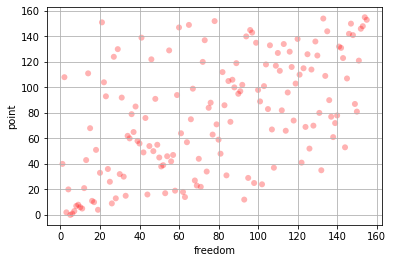

In [167]:
freedom = df1['Freedom']
point = df1.index
fig, ax = plt.subplots()
ax.scatter(freedom, point, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('point')
plt.show()

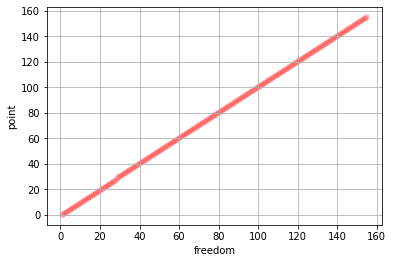

In [168]:
# Отсортируем по заначениям - видно что выбросов нет. Небольшой сдвиг линии в районе 28, это отсутствующий Катар. 
freedom = np.sort(df1['Freedom'])
point = df1.index
fig, ax = plt.subplots()
ax.scatter(freedom, point, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('point')
plt.show()

**Размах:**

In [152]:
print(max_v - min_v)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

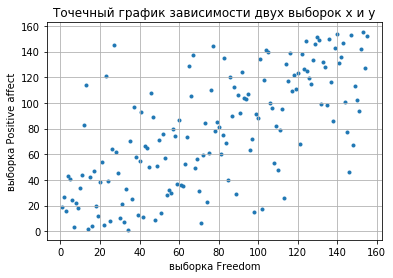

In [180]:
freedom = df1['Freedom']
positive_affect = df1['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [178]:
corr, p_value = sts.pearsonr(df1['Freedom'], df1['Positive affect'])
print(corr)

0.6817698430601657


*Заметная прямая корреляция*

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [183]:
#Центрирование
freedom = df1['Freedom']
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [184]:
# Масштабирование
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

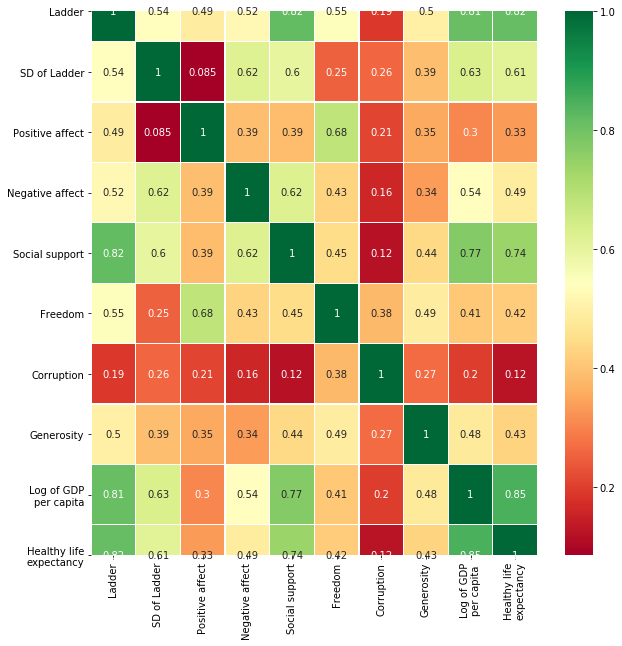

In [187]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(10,10)
plt.show()

Загрузить таблицу цен на авокадо: 

In [190]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

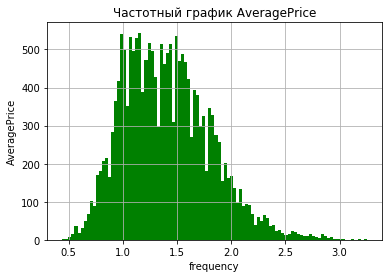

In [197]:
n_bins = len(df['AveragePrice'])
plt.hist(df['AveragePrice'], bins = 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()

*Нормальное распределение*

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

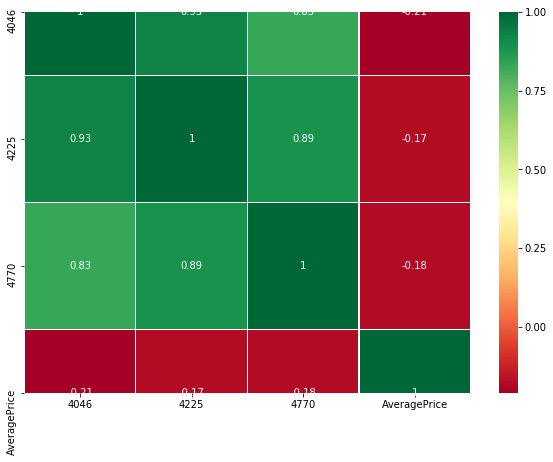

In [210]:
import seaborn as sns
df1 = df[['4046', '4225', '4770', 'AveragePrice']]
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(10,7)
plt.show()

In [212]:
print(df1.corr())

                  4046      4225      4770  AveragePrice
4046          1.000000  0.926110  0.833389     -0.208317
4225          0.926110  1.000000  0.887855     -0.172928
4770          0.833389  0.887855  1.000000     -0.179446
AveragePrice -0.208317 -0.172928 -0.179446      1.000000


*Количество проданных авокадо по типам напрямую коррелируются друг с другом. Средняя цена в обратной зависимости от количества проданных авокадо. Причиной скорее всего является сезонность. В сезон растут объёмы продаж и снижается цена.*